In [1]:
# using Pkg
# Pkg.add("DFTK")

using ParallelTemperingMonteCarlo
using DelimitedFiles


  ** incremental compilation may be fatally broken for this module **



┌ Warning: Replacing docs for `ParallelTemperingMonteCarlo.MCRun.sampling_step! :: Tuple{Any, Any, Any, Bool}` in module `ParallelTemperingMonteCarlo.MCRun`
└ @ Base.Docs docs/Docs.jl:240
  ** incremental compilation may be fatally broken for this module **

┌ Warning: Replacing docs for `ParallelTemperingMonteCarlo.MCRun.save_params :: Tuple{IOStream, ParallelTemperingMonteCarlo.InputParams.MCParams}` in module `ParallelTemperingMonteCarlo.MCRun`
└ @ Base.Docs docs/Docs.jl:240
  ** incremental compilation may be fatally broken for this module **

┌ Warning: Replacing docs for `ParallelTemperingMonteCarlo.MCRun.save_state :: Tuple{IOStream, ParallelTemperingMonteCarlo.MCRun.MCState}` in module `ParallelTemperingMonteCarlo.MCRun`
└ @ Base.Docs docs/Docs.jl:240
  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

┌ Warning: Replacing docs for `ParallelTemperingMonteCarlo.MCRun.save_results :: Tuple{P

In [2]:
using Random#,Plots

#set random seed - for reproducibility
Random.seed!(1234)

# number of atoms
n_atoms = 13

# temperature grid
ti = 4.
tf = 19.
n_traj = 22

temp = TempGrid{n_traj}(ti,tf) 

# MC simulation details
mc_cycles = 1008000 #default 20% equilibration cycles on top
mc_sample = 1  #sample every mc_sample MC cycles

#move_atom=AtomMove(n_atoms) #move strategy (here only atom moves, n_atoms per MC cycle)
displ_atom = 0.1 # Angstrom
n_adjust = 100

max_displ_atom = [0.1*sqrt(displ_atom*temp.t_grid[i]) for i in 1:n_traj]

mc_params = MCParams(mc_cycles, n_traj, n_atoms, mc_sample = mc_sample, n_adjust = n_adjust)

#moves - allowed at present: atom, volume and rotation moves (volume,rotation not yet implemented)
move_strat = MoveStrategy(atom_moves = n_atoms)  

#ensemble
ensemble = NVT(n_atoms)

#ELJpotential for neon
#c1=[-10.5097942564988, 0., 989.725135614556, 0., -101383.865938807, 0., 3918846.12841668, 0., -56234083.4334278, 0., 288738837.441765]
#elj_ne1 = ELJPotential{11}(c1)

c=[-10.5097942564988, 989.725135614556, -101383.865938807, 3918846.12841668, -56234083.4334278, 288738837.441765]
pot = ELJPotentialEven{6}(c)

#starting configurations
#icosahedral ground state of Ne13 (from Cambridge cluster database) in Angstrom
pos_ne13 = [[2.825384495892464, 0.928562467914040, 0.505520149314310],
[2.023342172678102,	-2.136126268595355, 0.666071287554958],
[2.033761811732818,	-0.643989413759464, -2.133000349161121],
[0.979777205108572,	2.312002562803556, -1.671909307631893],
[0.962914279874254,	-0.102326586625353, 2.857083360096907],
[0.317957619634043,	2.646768968413408, 1.412132053672896],
[-2.825388342924982, -0.928563755928189, -0.505520471387560],
[-0.317955944853142, -2.646769840660271, -1.412131825293682],
[-0.979776174195320, -2.312003751825495, 1.671909138648006],
[-0.962916072888105, 0.102326392265998,	-2.857083272537599],
[-2.023340541398004, 2.136128558801072,	-0.666071089291685],
[-2.033762834001679, 0.643989905095452, 2.132999911364582],
[0.000002325340981,	0.000000762100600, 0.000000414930733]]

#convert to Bohr
AtoBohr = 1.8897259886
pos_ne13 = pos_ne13 * AtoBohr

length(pos_ne13) == n_atoms || error("number of atoms and positions not the same - check starting config")

#boundary conditions 
bc_ne13 = SphericalBC(radius=6.2*AtoBohr)   #5.32 Angstrom

#starting configuration
start_config = Config(pos_ne13, bc_ne13)

#histogram information
n_bin = 100
#en_min = -0.006    #might want to update after equilibration run if generated on the fly
#en_max = -0.001    #otherwise will be determined after run as min/max of sampled energies (ham vector)

#construct array of MCState (for each temperature)
mc_states = [MCState(temp.t_grid[i], temp.beta_grid[i], start_config, pot; max_displ=[max_displ_atom[i],0.01,1.]) for i in 1:n_traj]

#results = Output(n_bin, max_displ_vec)
results = Output{Float64}(n_bin; en_min = mc_states[1].en_tot)



Output{Float64}(100, 0.0, 0.0, Float64[], Float64[], Float64[], Vector{Float64}[], Vector{Float64}[], Float64[], Float64[], Float64[], Float64[])

In [3]:
pptmc_run!(mc_states,move_strat,mc_params,pot,ensemble,results)

Beginning Equilibration




equilibration done


126 cycles of 1000 per 8 thread



cycle 10 of 126 complete



cycle 20 of 126 complete



cycle 30 of 126 complete



cycle 40 of 126 complete



cycle 50 of 126 complete



cycle 60 of 126 complete



cycle 70 of 126 complete



cycle 80 of 126 complete



cycle 90 of 126 complete



cycle 100 of 126 complete



cycle 110 of 126 complete



cycle 120 of 126 complete



main loop complete


beginning statistics




done


    Updating registry at `~/.julia/registries/General.toml`


   Resolving package versions...


   Installed OpenSSL_jll ───── v1.1.19+0


   Installed RecipesPipeline ─ v0.6.11
   Installed Qt5Base_jll ───── v5.15.3+2
   Installed Measures ──────── v0.3.2
   Installed LoggingExtras ─── v1.0.0
   Installed OpenSSL ───────── v1.3.2
   Installed HTTP ──────────── v1.5.5
   Installed Plots ─────────── v1.36.2
   Installed BitFlags ──────── v0.1.7


    Updating `~/ParallelTemperingMonteCarlo.jl/Project.toml`
  [91a5bcdd] + Plots v1.36.2
    Updating `~/ParallelTemperingMonteCarlo.jl/Manifest.toml`


  [6e4b80f9] - BenchmarkTools v1.3.2
  [d1d4a3ce] + BitFlags v0.1.7
  [944b1d66] + CodecZlib v0.7.0
  [35d6a980] + ColorSchemes v3.19.0
  [3da002f7] + ColorTypes v0.11.4
  [c3611d14] + ColorVectorSpace v0.9.9
  [5ae59095] + Colors v0.12.8
  [d38c429a] + Contour v0.6.2
  [c87230d0] + FFMPEG v0.4.1
  [53c48c17] + FixedPointNumbers v0.8.4
  [59287772] + Formatting v0.4.2
⌅ [28b8d3ca] + GR v0.69.5
  [42e2da0e] + Grisu v1.0.2
  [cd3eb016] + HTTP v1.5.5
  [83e8ac13] + IniFile v0.5.1
  [1019f520] + JLFzf v0.1.5
  [b964fa9f] + LaTeXStrings v1.3.0
  [23fbe1c1] + Latexify v0.15.17
  [e6f89c97] + LoggingExtras v1.0.0
  [739be429] + MbedTLS v1.1.7
  [442fdcdd] + Measures v0.3.2
  [4d8831e6] + OpenSSL v1.3.2
  [b98c9c47] + Pipe v1.3.0
  [ccf2f8ad] + PlotThemes v3.1.0
  [995b91a9] + PlotUtils v1.3.1
  [91a5bcdd] + Plots v1.36.2
  [01d81517] + RecipesPipeline v0.6.11
  [05181044] + RelocatableFolders v1.0.0
  [6c6a2e73] + Scratch v1.1.1
  [992d4aef] + Showoff v1.0.3
  [777ac1f9] + SimpleBufferStream 

Precompiling project...


  ✓ BitFlags


  ✓ OpenSSL_jll
  ✓ LoggingExtras
  ✓ Measures


  ✓ Qt5Base_jll
  ✓ FFMPEG_jll


  ✓ FFMPEG


  ✓ GR_jll


  ✓ OpenSSL


  ✓ HTTP


  ✓ RecipesPipeline


  ✓ GR


  ✓ Plots


  ✓ ParallelTemperingMonteCarlo


  14 dependencies successfully precompiled in 67 seconds. 198 already precompiled.
  1 dependency precompiled but a different version is currently loaded. Restart julia to access the new version


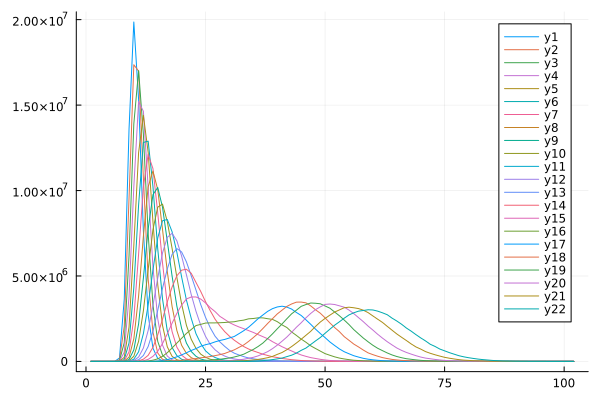

In [4]:
# using Pkg;Pkg.add("Plots")
using Plots
data = [results.en_histogram[i] for i in 1:n_traj]
plot(data)

In [18]:
# t = @benchmark ptmc_run!(mc_states, move_strat, mc_params, pot, ensemble, results; save_ham = false)
#plot(temp.t_grid,results.heat_cap)

# data = [results.en_histogram[i] for i in 1:n_traj]
# plot(data)
# benchtimes = []
# for num_threads = 2:8
#     mc_states = [MCState(temp.t_grid[i], temp.beta_grid[i], start_config, pot; max_displ=[max_displ_atom[i],0.01,1.]) for i in 1:n_traj]

# #results = Output(n_bin, max_displ_vec)
#     results = Output{Float64}(n_bin; en_min = mc_states[1].en_tot)
    
#     time = @benchmark pptmc_run!(mc_states,move_strat,mc_params,pot,ensemble,results,n_threads=$num_threads)
#     push!(benchtimes,time)

# end
# #using Plots
# [mean(benchtimes[i]).time for i=1:8]/10^9
# timearray = [median(benchtimes[i]).time for i=1:8]/10^9

Total number of moves per MC cycle: 13



equilibration done


MC loop done.


[0.0002486939649448063, 0.00026989215168220324, 0.0002970064091898903, 0.0003228592848400446, 0.0003582800959152993, 0.00039380182959072765, 0.0004332808429255307, 0.00048287071366261576, 0.0005513493841413091, 0.0006112562489265659, 0.0007142279513064177, 0.0009135801853600144, 0.0012032592171174873, 0.001776807494582261, 0.0029398449534944627, 0.0035608812970834786, 0.0032435647910505766, 0.0026042014114841527, 0.0023626419375324744, 0.0022744468722362475, 0.0022168720279022807, 0.0022879808893227927]
done
Total number of moves per MC cycle: 13

equilibration done


MC loop done.


[-4.64283754907596, -4.280813997427569, -3.943504697554974, -3.630204947168263, -3.3384834333098237, -3.0673031356605347, -2.814276485463904, -2.579152888771237, -2.360264643760773, -2.155124684164009, -1.961511568887231, -1.7788241557457352, -1.6026730063287395, -1.4207016056998176, -1.2205889994357544, -1.0128947915742788, -0.83259776400982, -0.6936095257433881, -0.5853076974366934, -0.49596696433014487, -0.41867336326328936, -0.3523811090049404]
done
Total number of moves per MC cycle: 

13

equilibration done


MC loop done.


[-13.929400785374307, -12.842824019474673, -11.830304088456762, -10.890828848574566, -10.016706325439111, -9.202152104511343, -8.444291414349674, -7.739291854058344, -7.082197413422901, -6.466147957572587, -5.88645096597435, -5.339920209552351, -4.810731940068512, -4.254908015951303, -3.6603704104744996, -3.04271946900014, -2.504800708024982, -2.09168583437994, -1.765877366445004, -1.4961927403598823, -1.2634837080609032, -1.0610351443575239]
done
Total number of moves per MC cycle: 

13

equilibration done


MC loop done.


[-27.85946111312938, -25.68602112568053, -23.66191212214904, -21.783605532558276, -20.03440870870056, -18.40540818431605, -16.890070003108484, -15.479883039596524, -14.165743198310544, -12.934128458118774, -11.777280186693165, -10.685433080095965, -9.62531359716877, -8.52688442971417, -7.333677281740143, -6.086682093247547, -5.022938224587596, -4.190249716915806, -3.536974730998638, -2.9955862382916365, -2.5312149589136843, -2.1282757025033097]
done


BenchmarkTools.Trial: 1 sample with 1 evaluation.
 Single result which took 211.713 s (5.94% GC) to evaluate,
 with a memory estimate of 125.95 GiB, over 828615949 allocations.

In [3]:
timearray = [907.371294532, 611.232182253, 470.086861784, 402.64785303, 379.904030116, 324.446037698, 317.525033041, 306.200239546]

8-element Vector{Float64}:
 907.371294532
 611.232182253
 470.086861784
 402.64785303
 379.904030116
 324.446037698
 317.525033041
 306.200239546

In [4]:
# using Plots

# p = plot(timearray,xlabel="threads",ylabel="run time",legend=false)
# png("btimes.png")